In [2]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [3]:
df = pd.read_csv('data/stud.csv')

In [4]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
# Preparing X and Y variables

# making independent feature
x = df.drop(columns=['math_score'], axis=1)

In [6]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [7]:
# dependent feature
y = df['math_score']

In [8]:
y.head(2)

0    72
1    69
Name: math_score, dtype: int64

In [9]:
# check number of unique feature of class
# Exploring data
print("Catergories in 'gender' vaiable : {}".format(df['gender'].nunique()), end=" ")
print(df['gender'].unique())

print("Catergories in 'ethinicity' vaiable : {}".format(df['race_ethnicity'].nunique()), end=" ")
print(df['race_ethnicity'].unique())

print("Catergories in 'parental level education' vaiable : {}".format(df['parental_level_of_education'].nunique()), end=" ")
print(df['parental_level_of_education'].unique())

print("Catergories in 'lunch' vaiable : {}".format(df['lunch'].nunique()), end=" ")
print(df['lunch'].unique())

print("Catergories in 'test preparation course' vaiable : {}".format(df['test_preparation_course'].nunique()), end=" ")
print(df['test_preparation_course'].unique())

Catergories in 'gender' vaiable : 2 ['female' 'male']
Catergories in 'ethinicity' vaiable : 5 ['group B' 'group C' 'group A' 'group D' 'group E']
Catergories in 'parental level education' vaiable : 6 ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Catergories in 'lunch' vaiable : 2 ['standard' 'free/reduced']
Catergories in 'test preparation course' vaiable : 2 ['none' 'completed']


In [10]:
# create column transformer with 3 types of transformer
num_feature = x.select_dtypes(exclude='object').columns
cat_feature = x.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# ColumnTransformer is used to make PIPELINE, combining OneHotEncoder, and StandardScaler 

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()


preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_feature), # oh_transformer applied only on cat_feature
        ("StandardScalar", numeric_transformer, num_feature)
    ]
)


In [11]:
X = preprocessor.fit_transform(x)
X.shape # this column transfor is powerfull tool 

(1000, 19)

In [13]:
# Prepare train test 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

# Create an Evaluate function to give all metrics after model training

In [21]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_absolute_error(true, predicted))
    r2_square = r2_score(true, predicted)

    return mae,rmse, r2_square

# Create model

In [24]:
# Create a model list , making in dictionary format
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K- Neighbours Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor":RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    # Train model
    model.fit(X_train, y_train)

    # Make prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate train and test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    # Print everything

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance for training set")
    print("-Root mean squared error :{:.4f}".format(model_train_rmse))
    print("-Mean absolute error:{:.4f}".format(model_train_mae))
    print("-R2 score :{:.4f}".format(model_train_r2))


    print('--------------------------------------------')

    print("Model perfromance for test set")
    print("-Root mean squared error :{:.4f}".format(model_test_rmse))
    print("-Mean absolute error:{:.4f}".format(model_test_mae))
    print("-R2 score :{:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')




Linear Regression
Model performance for training set
-Root mean squared error :2.0656
-Mean absolute error:4.2667
-R2 score :0.8743
--------------------------------------------
Model perfromance for test set
-Root mean squared error :2.0530
-Mean absolute error:4.2148
-R2 score :0.8804


Lasso
Model performance for training set
-Root mean squared error :2.2817
-Mean absolute error:5.2063
-R2 score :0.8071
--------------------------------------------
Model perfromance for test set
-Root mean squared error :2.2711
-Mean absolute error:5.1579
-R2 score :0.8253


Ridge
Model performance for training set
-Root mean squared error :2.0652
-Mean absolute error:4.2650
-R2 score :0.8743
--------------------------------------------
Model perfromance for test set
-Root mean squared error :2.0521
-Mean absolute error:4.2111
-R2 score :0.8806


K- Neighbours Regressor
Model performance for training set
-Root mean squared error :2.1253
-Mean absolute error:4.5168
-R2 score :0.8555
-------------------

# Results

In [27]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=['R2_Score'], ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880433
5,Random Forest Regressor,0.853905
7,CatBoosting Regressor,0.851632
8,AdaBoost Regressor,0.846952
1,Lasso,0.825320
6,XGBRegressor,0.821589
3,K- Neighbours Regressor,0.783813
4,Decision Tree,0.731115


# Linear Regression

In [29]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the Linear regression model %.2f" %score)

Accuracy of the Linear regression model 88.04


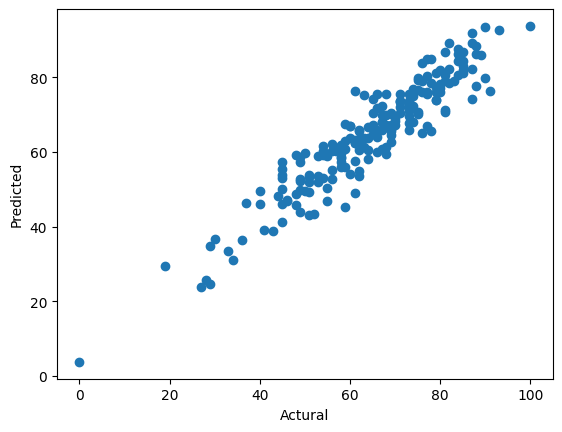

In [31]:
# Plot y_pred and y_test
plt.scatter(y_test, y_pred)
plt.xlabel('Actural')
plt.ylabel('Predicted')
plt.show()

<AxesSubplot:xlabel='math_score'>

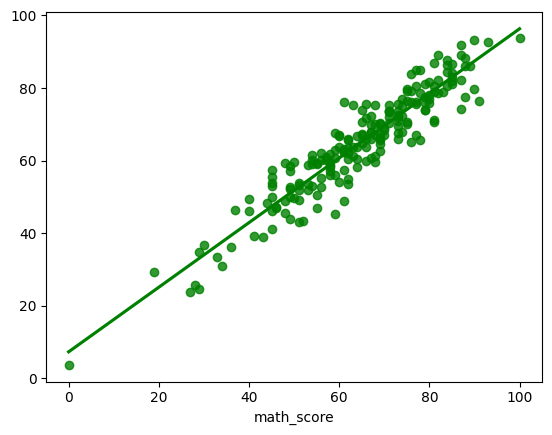

In [32]:
sns.regplot(x=y_test, y=y_pred, ci = None, color='green')

In [35]:
# Difference between actual and predicted values
pred_diff = pd.DataFrame({'Actual values':y_test, 'Predicted values':y_pred, 'Difference':y_test-y_pred})
print(pred_diff)

     Actual values  Predicted values  Difference
521             91         76.387970   14.612030
737             53         58.885970   -5.885970
740             80         76.990265    3.009735
660             74         76.851804   -2.851804
411             84         87.627378   -3.627378
..             ...               ...         ...
408             52         43.409149    8.590851
332             62         62.152214   -0.152214
208             74         67.888395    6.111605
613             65         67.022287   -2.022287
78              61         62.345132   -1.345132

[200 rows x 3 columns]
